# Topic 3: Neural Networks, Introduction and Dense Networks
### In this notebook, we will introduce some foundational concepts and then build a dense neural network to solve the XOR function.
### Note: Before using this notebook, take a look at the code in neural_nets.py, which implements dense network and backpropagation from scratch


## Foundational Concepts
### Activation Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from neural_nets import *

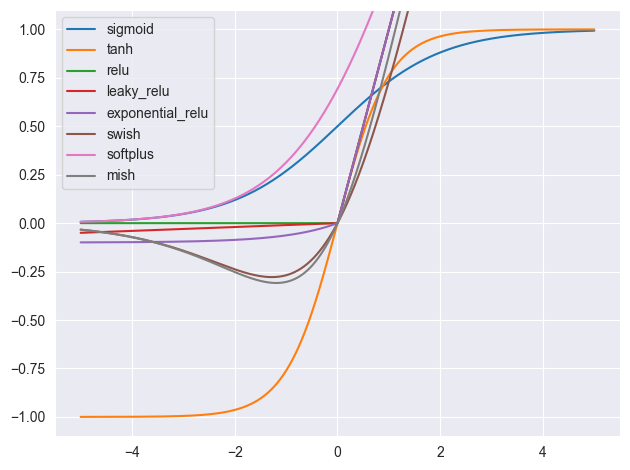

In [2]:
# list of activation functions we are going to look at
activation_functions = [sigmoid, tanh, relu, leaky_relu, exponential_relu, swish, softplus, mish]
labels = ["sigmoid", "tanh", "relu", "leaky_relu", "exponential_relu", "swish", "softplus", "mish"]
inputs = np.linspace(-5, 5, 1000)
for f in activation_functions:
    plt.plot(inputs, f(inputs))
plt.legend(labels)
plt.ylim((-1.1, 1.1))
plt.tight_layout()

### Activation Function Gradients

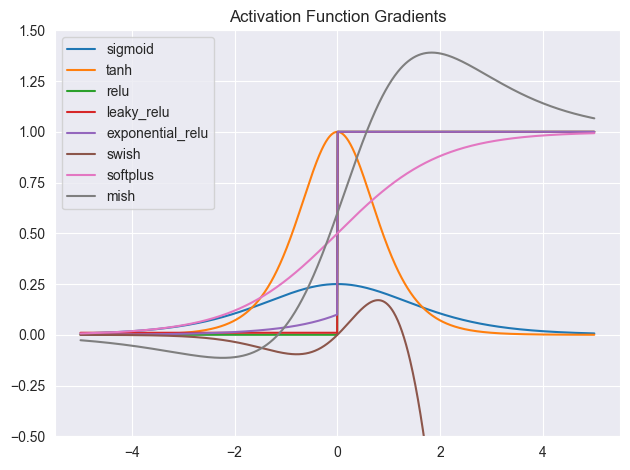

In [3]:
# list of activation function gradients we are going to look at
activation_function_gradients = [sigmoid_gradient, tanh_gradient, relu_gradient, leaky_relu_gradient, exponential_relu_gradient, swish_gradient, softplus_gradient, mish_gradient]
labels = ["sigmoid", "tanh", "relu", "leaky_relu", "exponential_relu", "swish", "softplus", "mish"]
inputs = np.linspace(-5, 5, 1000)
for f in activation_function_gradients:
    plt.plot(inputs, f(inputs))
plt.legend(labels)
plt.ylim((-0.5, 1.5))
plt.title("Activation Function Gradients")
plt.tight_layout()

## Dense Networks
### We will now train a simple neural network to learn the XOR function, which is a nonlinear problem

In [4]:
# Create a neural network with 2 input neurons
nn = NeuralNetwork(2)
# add a hidden layer with tanh activation function
nn.add_layer(2, tanh, tanh_gradient, uniform_weight_min=-5.0, uniform_weight_max=1.0)
# add the output layer, also with tanh activation function
nn.add_layer(1, tanh, tanh_gradient, is_output_layer=True, uniform_weight_min=-1.0, uniform_weight_max=1.0)

# This is the truth table for the XOR function, which will be our training data
X = np.array([[0, 1], [0, 0], [1, 0], [1, 1]])
Y = np.array([[1], [0], [1], [0]])

# train the network. Both the validation and training set are the same in this case, which is normally bad practice, but is OK for a simple demonstration
tloss, vloss = nn.train(X, Y, X, Y, mse, mse_gradient, learning_rate=0.06, epochs=5000, batch_size=1, momentum=0.03)

# Now perform some prediction. Outputs are rounded and converted to integers so that it acts as a true XOR function
print("Prediction for [0, 1] is: ", int(np.round(nn.predict(np.array([0, 1])))))
print("Prediction for [0, 0] is: ", int(np.round(nn.predict(np.array([0, 0])))))
print("Prediction for [1, 0] is: ", int(np.round(nn.predict(np.array([1, 0])))))
print("Prediction for [1, 1] is: ", int(np.round(nn.predict(np.array([1, 1])))))

Prediction for [0, 1] is:  1
Prediction for [0, 0] is:  0
Prediction for [1, 0] is:  1
Prediction for [1, 1] is:  0


Text(0, 0.5, 'MSE Loss')

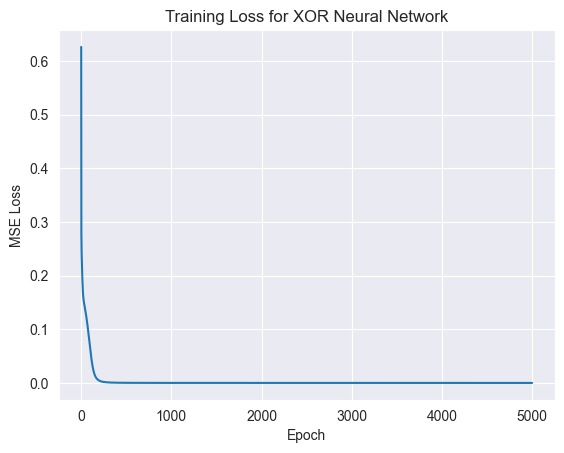

In [5]:
# Plot the training loss.
plt.plot(tloss)
plt.title("Training Loss for XOR Neural Network")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")

### Exploration with Current Code

#### XOR is actually a fairly challenging problem for small networks without additional algorithms to counteract local minima. Try changing up the network config to see how performance is affected. You may notice that one configuration may work for one random number seed and not another. Try to maximize training reliability by adjusting the hyperparameters.
- Try swapping activation functions. Do not forget to also change the activation function gradient!
- Try adjusting the number of neurons in the hidden layer.
- Try increasing the number of layers in the network.
- Try to adjust the learning rate and momentum. What happens if the learning rate/momentum are large (>1) or small (<0.01).


### Additional Features to Implement

#### On your own time, try implementing the following features
- Additional activation functions
- Additional loss functions
- Enable classification by implementing the softmax activation function and cross-entropy loss
- Implement additional optimizers